In [134]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sn

Successfully imported tensorflow

In [135]:
(X_train, y_train), (X_test, y_test)= keras.datasets.mnist.load_data()
print(len(X_train))

60000


Got dataset from keras


4


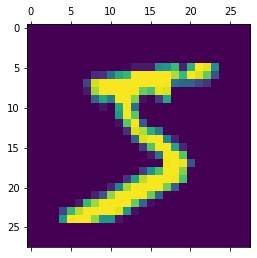

In [136]:
plt.matshow(X_train[0])
print(y_train[2])

X train is to train the numbers?
y train im not sure

In [137]:
print(X_train.shape)
X_train_flattened=X_train.reshape(len(X_train),28*28 )
print(X_train_flattened.shape)
print(X_test.shape)
X_test_flattened=X_test.reshape(len(X_test),28*28 )
print(X_test_flattened.shape)

(60000, 28, 28)
(60000, 784)
(10000, 28, 28)
(10000, 784)


Reshape the X train with pandas

In [138]:
model=keras.Sequential([keras.layers.Dense(10,input_shape=(784,), activation='sigmoid')])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 9.8443 - accuracy: 0.8384
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 6.0098 - accuracy: 0.8770
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.6201 - accuracy: 0.8828
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.4537 - accuracy: 0.8857
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.4110 - accuracy: 0.8864


Dense means every neuron is connected to a neuron from the output layer

Now we will try scaling the model to have higher accuracy.

In [139]:

X_train=X_train/255
X_train_flattened=X_train.reshape(len(X_train),28*28 )
X_test=X_test/255
X_test_flattened=X_test.reshape(len(X_test),28*28 )
model=keras.Sequential([keras.layers.Dense(10,input_shape=(784,), activation='sigmoid')])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_flattened, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4699 - accuracy: 0.8771
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3040 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2834 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2727 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2662 - accuracy: 0.9258


Now we try to evaluate the accuracy on a test data set. Always evaluate accuracy on a test data set. Simple neural network, takes less time for training

In [140]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 967us/step - loss: 0.2685 - accuracy: 0.9232


[0.2684866786003113, 0.9232000112533569]

313/313 [==============================] - 0s 900us/step
[2.1210991e-02 6.7472274e-07 6.1637077e-02 9.7504371e-01 2.8691674e-03
 1.4194219e-01 1.9504055e-06 9.9985141e-01 1.0768180e-01 7.4336553e-01]
7


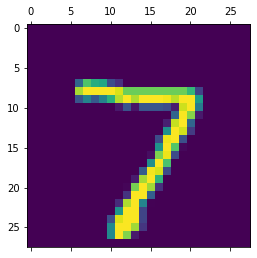

In [141]:
plt.matshow(X_test[0])
y_predicted=model.predict(X_test_flattened)
print(y_predicted[0])
print(np.argmax(y_predicted[0]))

In [142]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]

cm= tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

Text(69.0, 0.5, 'Truth')

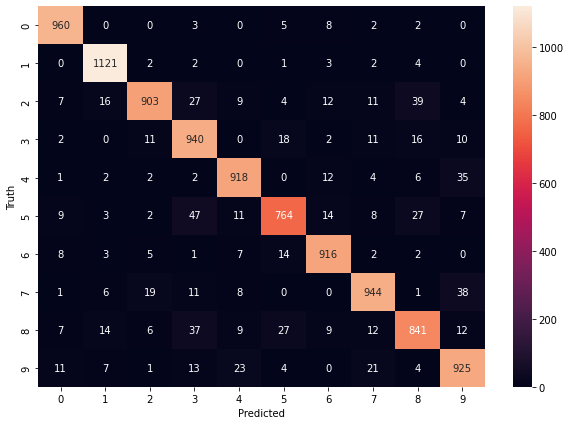

In [143]:
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Now we add a hidden layer. It generally improves performance.

In [144]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
     ])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2751 - accuracy: 0.9217
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1240 - accuracy: 0.9633
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0862 - accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0665 - accuracy: 0.9793
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0518 - accuracy: 0.9839


In [146]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0815 - accuracy: 0.9751


[0.08150691539049149, 0.9750999808311462]

313/313 [==============================] - 0s 1ms/step


Text(69.0, 0.5, 'Truth')

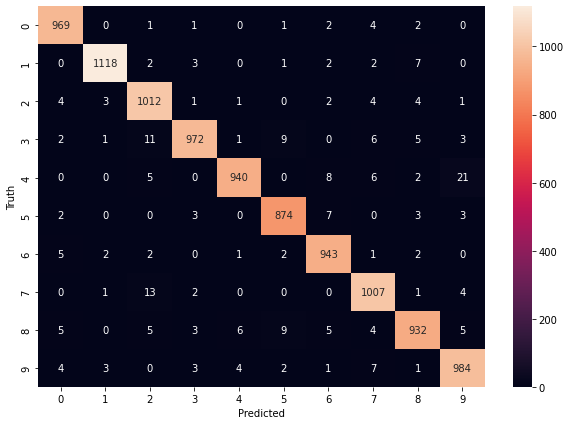

In [148]:
y_predicted=model.predict(X_test_flattened)
y_predicted_labels=[np.argmax(i) for i in y_predicted]

cm= tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')